<a href="https://colab.research.google.com/github/iainonline/project-pump-public/blob/main/multivariate_model_training_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
# Iain McIntosh
# 11/28/2023
# Python notebook to forecast future tracks based on trained model and input
# from multiple variables

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

print('Libraries imported')

Libraries imported


In [78]:
# Example DataFrame created below
# This will match the data format for the data I have already captured
# This notebood is to prove the model is performing true time series analysis
# Before I proceed to use real data

# generate a list in time date format seperated by 0.05 seconds
timelist = pd.date_range('2023-01-01', periods=15, freq='50ms').tolist()

data = {
    'time': timelist,
    'feature1': [1.5, 2.4, 3, 4.6, 5.3, 6.2, 7.1, 8.5, 9.5, 8, 7, 6, 5, 4, 3],
    'feature2': [1, 2, 3.5, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'target': [2, 4, 6, 8.5, 10, 12, 15, 16, 18, 16, 14, 10.5, 8, 4, 2]}

print('Multivariate data created')

Multivariate data created


In [79]:
df = pd.DataFrame(data)

# Set index to time column
df.set_index('time', inplace=True)
print('index set to time column')

index set to time column


In [80]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]
print('Data split into training and testing sets')

Data split into training and testing sets


In [81]:
# Fit ARIMA model

# set model frequency to 50ms
order = (1, 1, 1)  # Default order which will need to be tuned to best fit the data
model = ARIMA(train['target'], exog=train[['feature1', 'feature2']], order=order, freq='50L')
fit_model = model.fit()
print('ARIMA model fitted\n')

ARIMA model fitted



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 50L will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [82]:
# Forecast for test set
forecast = fit_model.forecast(steps=len(test), exog=test[['feature1', 'feature2']])
print('Forecast for test set completed')

# Evaluate the model
mse = mean_squared_error(test['target'], forecast)
print(f'Model valuated with Mean Squared Error: {mse}')

# Save the model
fit_model.save('model.pkl')
print('Model saved')

Forecast for test set completed
Model valuated with Mean Squared Error: 6.655167646070788
Model saved


In [83]:
# create a new dataframe with the features required for the future predictions
# generate a list in time date format seperated by 0.05 seconds
timelist = pd.date_range('2023-01-01 00:00:00.750000', periods=5, freq='50ms').tolist()

future = pd.DataFrame({'feature1': [16.5,17.5,18.5,19.5,20.5], 'feature2': [16,17,18,19,20], 'futuretime': timelist})

# set the index of future dataframe to the futuretime column
future.set_index('futuretime', inplace=True)


# concatenate the future dataframe with the original dataframe
pred = pd.concat([df, future], ignore_index=False)

print('Dataframe for predicitons created')

Dataframe for predicitons created


In [84]:
# add a column to the dataframe with the forecast values
prediction = fit_model.forecast(steps=len(pred), exog=pred[['feature1', 'feature2']])

# sort the dataframe by the index
prediction.sort_index(inplace=True)

In [85]:
# add the forecast values to pred dataframe
pred['forecast'] = prediction.values

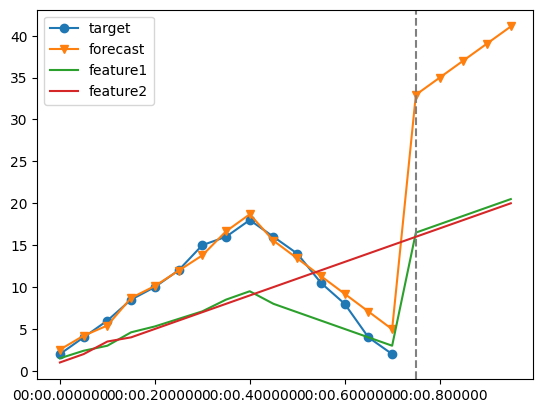


Data for chart above listed below

                         feature1  feature2  target   forecast
2023-01-01 00:00:00.000       1.5       1.0     2.0   2.531957
2023-01-01 00:00:00.050       2.4       2.0     4.0   4.191920
2023-01-01 00:00:00.100       3.0       3.5     6.0   5.410429
2023-01-01 00:00:00.150       4.6       4.0     8.5   8.706894
2023-01-01 00:00:00.200       5.3       5.0    10.0  10.122663
2023-01-01 00:00:00.250       6.2       6.0    12.0  11.952411
2023-01-01 00:00:00.300       7.1       7.0    15.0  13.782362
2023-01-01 00:00:00.350       8.5       8.0    16.0  16.650063
2023-01-01 00:00:00.400       9.5       9.0    18.0  18.687542
2023-01-01 00:00:00.450       8.0      10.0    16.0  15.536083
2023-01-01 00:00:00.500       7.0      11.0    14.0  13.422411
2023-01-01 00:00:00.550       6.0      12.0    10.5  11.308739
2023-01-01 00:00:00.600       5.0      13.0     8.0   9.195068
2023-01-01 00:00:00.650       4.0      14.0     4.0   7.081396
2023-01-01 00:00:00

In [86]:
# plot the actual values vs the forecast values
plt.plot(pred['target'], label='target', marker='o')
plt.plot(pred['forecast'], label='forecast', marker='v')

# add feature1 and feature2 to the plot
plt.plot(pred['feature1'], label='feature1')
plt.plot(pred['feature2'], label='feature2')

plt.legend(loc='upper left')

# draw a vertical line to show where the future predictions on unseen data start
plt.axvline(x=pred.index[len(df)], color='grey', linestyle='--')

# show the plot
plt.show()

#print the dataframe
print('\nData for chart above listed below\n')
print(pred)